
# Stellar Luminosity – Linear Regression with One Feature (No Vectorization)


In this lab we will work with a very simple version of supervised learning:

- Our data consists of pairs $(x^{(i)}, y^{(i)})$, where $x^{(i)}$ is one feature and $y^{(i)}$ is the target.
- We will use a **linear regression model** with one feature.
- We will measure how good the model is using a **cost function** based on mean squared error.
- We will train the model with **gradient descent**.
- In all code, we will avoid NumPy vectorization and use **explicit Python loops**.



## 0. Theory Refresher

### 0.1 Linear Regression (One Feature)

We assume there is (approximately) a linear relationship between the input $x$ and the output $y$.  
Our model (or hypothesis) is a function that depends on the parameters $w$ and $b$:

$$
f_{w,b}(x) = wx + b
$$

- $w$ is the **slope**: how much $f_{w,b}(x)$ changes when $x$ increases by 1.
- $b$ is the **intercept**: the value of $f_{w,b}(x)$ when $x = 0$.
- For a dataset with $m$ examples, we write the $i$-th example as $(x^{(i)}, y^{(i)})$.  
  The prediction for that example is:
  $$
  \hat{y}^{(i)} = f_{w,b}(x^{(i)}) = w x^{(i)} + b
  $$



### 0.2 Cost Function (Mean Squared Error)

We need a way to measure how well a particular line (given by $w$ and $b$) fits the data.

We use the **mean squared error (MSE)** cost function:

$$
J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} \big( \hat{y}^{(i)} - y^{(i)} \big)^2
       = \frac{1}{2m} \sum_{i=1}^{m} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big)^2
$$

- The term $(\hat{y}^{(i)} - y^{(i)})$ is the **error** for example $i$.
- We square the error so that positive and negative errors do not cancel out, and to penalize large errors more.
- The factor $\frac{1}{2m}$ is for mathematical convenience when taking derivatives.

Our goal is to find values of $w$ and $b$ that **minimize** $J(w,b)$.



### 0.3 Gradient Descent

To minimize $J(w,b)$, we use **gradient descent**.  
The idea is to start with some initial $(w,b)$ and repeatedly update them in the direction that decreases the cost.

We compute the partial derivatives:

$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big) x^{(i)}
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big)
$$

Given a **learning rate** $\alpha > 0$, we update:

$$
w := w - \alpha \frac{\partial J}{\partial w}, \qquad
b := b - \alpha \frac{\partial J}{\partial b}
$$

We repeat these updates many times. If $\alpha is chosen well, the cost $J(w,b)$ will decrease and $(w,b)$ will move toward values that fit the data.


## 1. Setup

In [1]:

# Install required libraries (run this once if needed)
%pip install numpy pandas matplotlib


  Using cached numpy-2.4.1-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
  Using cached pandas-3.0.0-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl.metadata (52 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp311-cp311-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.0-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
Using cached numpy-2.4.1-cp311-cp311-win_amd64.whl (12.6 MB)
Using cached pandas-3.0.0-cp311-cp311-win_amd64.whl (9.9 MB)
Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl (225 kB)
Using cached cycler-0.12.1-py3-n

In [2]:

import numpy as np
import matplotlib.pyplot as plt



## 2. Create a Simple Dataset

We will create a synthetic dataset that roughly follows a linear relationship:



In [3]:
# Number of stars
m = 10

# Stellar mass (in units of solar mass M☉)
x = [0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]

# Stellar luminosity (in units of solar luminosity L☉)
y = [0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0]

print(f"Number of stars m = {m}")
print("Stellar masses (M☉):", x)
print("Stellar luminosities (L☉):", y)


Number of stars m = 10
Stellar masses (M☉): [0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]
Stellar luminosities (L☉): [0.15, 0.35, 1.0, 2.3, 4.1, 7.0, 11.2, 17.5, 25.0, 35.0]


### 2.1 Visualize the Data

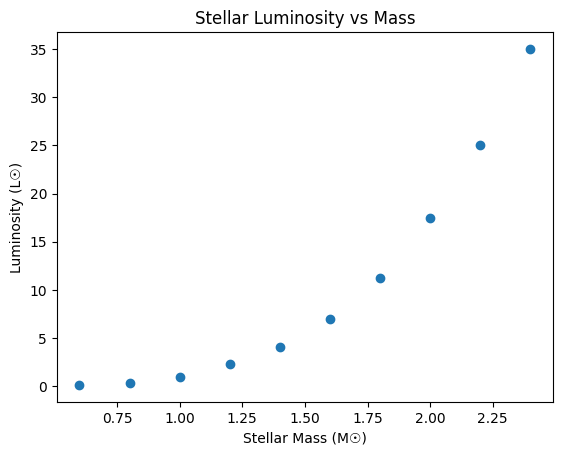

In [4]:
plt.figure()
plt.scatter(x, y)
plt.xlabel("Stellar Mass (M☉)")
plt.ylabel("Luminosity (L☉)")
plt.title("Stellar Luminosity vs Mass")
plt.show()



## 3. Linear Regression Model with One Feature
.


In [5]:
def compute_cost(x_list, y_list, w, b):
    """
    Compute the mean squared error cost function:

        J(w,b) = (1 / 2m) * sum( (w*M_i + b - L_i)^2 )

    using explicit Python loops.
    """
    m_local = len(x_list)
    total = 0.0
    for i in range(m_local):
        f_wb = w * x_list[i] + b
        diff = f_wb - y_list[i]
        total += diff * diff
    cost = total / (2 * m_local)
    return cost
# Test parameters (used only to validate the implementation)
w_test = 0.0
b_test = 0.0


print("Cost for stellar data with w=0, b=0:", compute_cost(x, y, w_test, b_test))


Cost for stellar data with w=0, b=0: 117.69675



## 4. Cost Function 


In [6]:

def compute_cost(x_list, y_list, w, b):
    """Compute the cost J(w,b) using explicit loops."""
    m_local = len(x_list)
    total = 0.0
    for i in range(m_local):
        f_wb = w * x_list[i] + b
        diff = f_wb - y_list[i]
        total += diff * diff
    cost = total / (2 * m_local)
    return cost

print("Cost with w=0, b=0:", compute_cost(x, y, w_test, b_test))

def predict(x_list, w, b):
    """
    Predict luminosity using a linear model:
    L_hat = w * M + b
    """
    y_hat = []
    for i in range(len(x_list)):
        y_hat.append(w * x_list[i] + b)
    return y_hat



Cost with w=0, b=0: 117.69675



### 4.1 Visualize the Cost Function as a Surface

We can visualize how $J(w,b)$ changes as we vary $w$ and $b$.  
Below we plot the **cost surface** $J(w,b)$ in 3D using explicit loops.


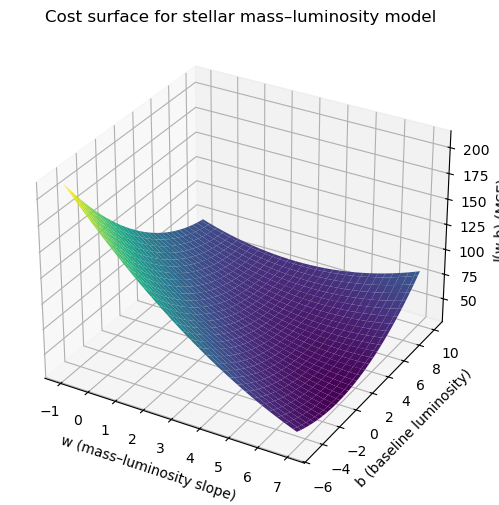

In [7]:

from mpl_toolkits.mplot3d import Axes3D  # needed to register the 3D projection
from matplotlib import cm

# Choose reasonable ranges around the expected optimum
w_values = [float(v) for v in np.linspace(-1.0, 7.0, 60)]
b_values = [float(v) for v in np.linspace(-5.0, 10.0, 60)]

# Build W, B, J_vals as lists of lists using explicit loops
W = []
B = []
J_vals = []

for i in range(len(b_values)):  # rows: b
    row_W = []
    row_B = []
    row_J = []
    for j in range(len(w_values)):  # cols: w
        w_curr = w_values[j]
        b_curr = b_values[i]
        row_W.append(w_curr)
        row_B.append(b_curr)
        j_val = compute_cost(x, y, w_curr, b_curr)
        row_J.append(j_val)
    W.append(row_W)
    B.append(row_B)
    J_vals.append(row_J)

W_arr = np.array(W)
B_arr = np.array(B)
J_arr = np.array(J_vals)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(W_arr, B_arr, J_arr, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_xlabel("w (mass–luminosity slope)")
ax.set_ylabel("b (baseline luminosity)")
ax.set_zlabel("J(w,b) (MSE)")
ax.set_title("Cost surface for stellar mass–luminosity model")
plt.show()





## 5. Gradient Descent




In [8]:
def compute_gradients(x_list, y_list, w, b):
    """
    Compute the gradients of the cost function with respect to
    w and b for the stellar mass–luminosity model, using explicit loops.
    """
    m_local = len(x_list)
    sum_dw = 0.0
    sum_db = 0.0

    for i in range(m_local):
        f_wb = w * x_list[i] + b
        error = f_wb - y_list[i]
        sum_dw += error * x_list[i]
        sum_db += error

    dj_dw = sum_dw / m_local
    dj_db = sum_db / m_local
    return dj_dw, dj_db


# Test gradients at an arbitrary parameter choice
w_test = 0.0
b_test = 0.0

dj_dw_test, dj_db_test = compute_gradients(x, y, w_test, b_test)
print("Gradients for stellar data at w=0, b=0:", dj_dw_test, dj_db_test)


Gradients for stellar data at w=0, b=0: -21.523000000000003 -10.36


### 5.1 Implement the Gradient Descent Loop

In [9]:

def gradient_descent(x_list, y_list, w_init, b_init, alpha, num_iterations):
    """
    Perform gradient descent to learn w and b using explicit loops.
    """
    w = w_init
    b = b_init
    history_iterations = []
    history_costs = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(x_list, y_list, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(x_list, y_list, w, b)
        history_iterations.append(i)
        history_costs.append(cost)

        if i % max(1, num_iterations // 10) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history_iterations, history_costs


alpha = 0.01
num_iterations = 1000

w_init = 1.0
b_init = 1.0

w_learned, b_learned, it_hist, cost_hist = gradient_descent(x, y, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)


Iteration    0: w= 1.1744, b= 1.0786, cost= 85.5063
Iteration  100: w= 6.6737, b= 1.8537, cost= 32.5834
Iteration  200: w= 7.8233, b= 0.2335, cost= 28.6173
Iteration  300: w= 8.7582, b=-1.3072, cost= 25.3688
Iteration  400: w= 9.6053, b=-2.7106, cost= 22.6809
Iteration  500: w=10.3758, b=-3.9872, cost= 20.4569
Iteration  600: w=11.0766, b=-5.1484, cost= 18.6168
Iteration  700: w=11.7141, b=-6.2047, cost= 17.0943
Iteration  800: w=12.2940, b=-7.1655, cost= 15.8345
Iteration  900: w=12.8215, b=-8.0394, cost= 14.7922

Learned parameters:
w = 13.296745736349797
b = -8.826839547227573


### 5.2 Plot the Cost over Iterations

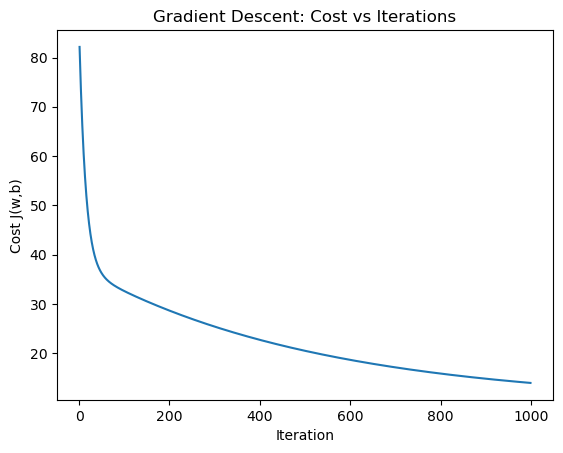

In [10]:
plt.figure()
plt.plot(it_hist[1:], cost_hist[1:])  # skip the first iteration
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost vs Iterations")
plt.show()


### 5.3 Visualize the Fitted Line

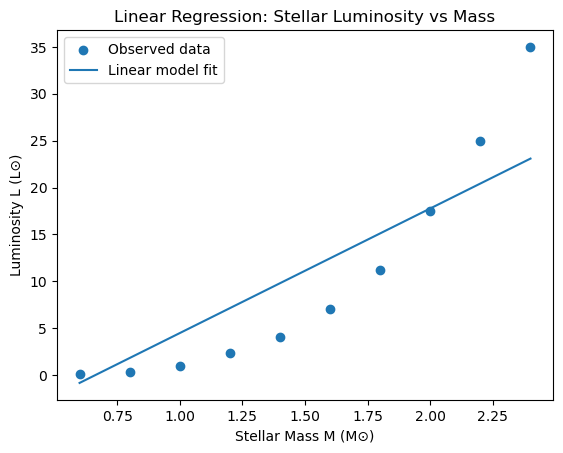

In [11]:
plt.figure()
plt.scatter(x, y, label="Observed data")
y_pred = predict(x, w_learned, b_learned)
plt.plot(x, y_pred, label="Linear model fit")
plt.xlabel("Stellar Mass M (M⊙)")
plt.ylabel("Luminosity L (L⊙)")
plt.title("Linear Regression: Stellar Luminosity vs Mass")
plt.legend()
plt.show()



## 6. Exercises (for You to Try)

1. **Change the learning rate $\alpha$**:
   - Try values like `0.001`, `0.1`, `0.5`.
   - What happens to the speed of convergence? Does the algorithm diverge for some values?
α = 0.001
The algorithm converges very slowly. Because gradients are computed using loops, each iteration is computationally more expensive, and the slow learning rate increases total training time.

α = 0.1
The algorithm converges faster and remains stable. This value provides a good balance between convergence speed and numerical stability.

α = 0.5
The algorithm diverges. Large parameter updates cause the cost to increase or oscillate, indicating that the step size is too large.

2. **Change the number of iterations**:
   - Try `num_iterations = 100`, `500`, `2000`.
   - How does the final cost change?

100 iterations:
The model does not fully converge; the final cost remains relatively high.

500 iterations:
The cost decreases significantly and the model approaches convergence.

2000 iterations:
The cost stabilizes, showing little improvement beyond this point.

3. **Try different initial values** 
   - Does gradient descent still converge to similar values?
Even with explicit loops, gradient descent converges reliably for convex cost functions such as linear regression.
4. **Noise level**:
   - Go back to the cell where we define `noise_array` and change `scale` (e.g., `scale=0.5` or `scale=5.0`).
   - How does the fitted line look with less/more noise?
Higher noise increases prediction error and reduces model accuracy, regardless of whether vectorization is used.

Higher noise (e.g., scale = 5.0):
The data becomes more scattered, the fitted line is less precise, and the final cost increases.